# Clustering - Part 2

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import MiniBatchKMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [2]:
sns.set_theme()

# Data Preparation

In [3]:
df3 = pd.read_csv("df3.csv")

In [4]:
X = df3.drop(columns=["CustomerID"])
scaler = RobustScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns = df3.columns[1:])
y = df3["CustomerID"]

In [5]:
X.head()

,Recency,Frequency,AverageTicket,Returns
0,2.847162,10.333333,-0.483122,1.0
1,-0.122271,0.333333,2.500186,7.0
2,0.436681,1.000000,-0.381893,0.0
3,-0.174672,3.000000,0.404194,4.0
4,-0.331878,4.333333,0.137684,6.0


In [6]:
y[:5]

0    17850
1    13047
2    13748
3    15291
4    14688
Name: CustomerID, dtype: int64

# Model Training

## K-Means

In [32]:
kmeans_model = MiniBatchKMeans(n_clusters=4, random_state=1)
kmeans_model.fit(X)
df3["KMeansCluster"] = kmeans_model.predict(X)

## Hierarchical Clustering

In [8]:
hc_model = AgglomerativeClustering(n_clusters=3, linkage="ward") 
df3["HierarchicalCluster"] = hc_model.fit_predict(X)

# Model Performance

As seen in the previous notebook. One of the metrics for clustering is the silhouette score, which was used for selecting the clustering model and number of clusters.

In [16]:
metrics_df = pd.DataFrame()
metrics_df["Model"] = ["K-Means", "HC"]

In [21]:
sil_list = []
sil_list.append(silhouette_score(X, df3["KMeansCluster"], metric="euclidean"))
sil_list.append(silhouette_score(X, df3["HierarchicalCluster"], metric="euclidean"))
metrics_df["Silhouette"] = sil_list

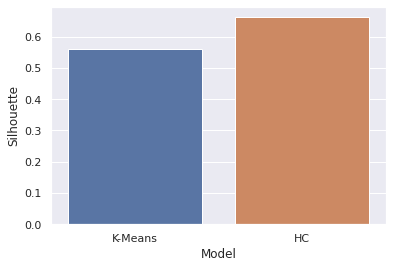

In [24]:
sns.barplot(data=metrics_df, x="Model", y="Silhouette");

Another way of visualizing the clusters is by displaying a two-dimensional plot, selecting two features at a time.

<AxesSubplot:xlabel='Returns', ylabel='Frequency'>

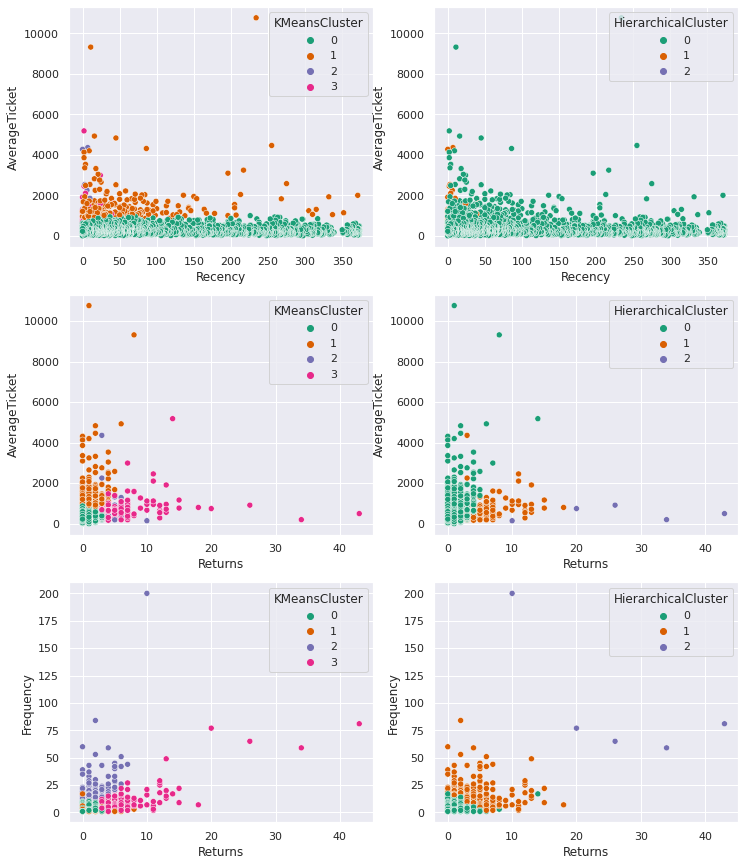

In [53]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(12,15))
sns.scatterplot(data=df3, x="Recency", y="AverageTicket", hue="KMeansCluster", palette="Dark2", ax=ax1)
sns.scatterplot(data=df3, x="Recency", y="AverageTicket", hue="HierarchicalCluster", palette="Dark2", ax=ax2)
sns.scatterplot(data=df3, x="Returns", y="AverageTicket", hue="KMeansCluster", palette="Dark2", ax=ax3)
sns.scatterplot(data=df3, x="Returns", y="AverageTicket", hue="HierarchicalCluster", palette="Dark2", ax=ax4)
sns.scatterplot(data=df3, x="Returns", y="Frequency", hue="KMeansCluster", palette="Dark2", ax=ax5)
sns.scatterplot(data=df3, x="Returns", y="Frequency", hue="HierarchicalCluster", palette="Dark2", ax=ax6)